In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 5)
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("data/delivery_data.csv")

In [3]:
df.shape
df.columns

Index(['payment_type', 'profit_per_order', 'sales_per_customer', 'category_id',
       'category_name', 'customer_city', 'customer_country', 'customer_id',
       'customer_segment', 'customer_state', 'customer_zipcode',
       'department_id', 'department_name', 'latitude', 'longitude', 'market',
       'order_city', 'order_country', 'order_customer_id', 'order_date',
       'order_id', 'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total_amount', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'product_card_id', 'product_category_id',
       'product_name', 'product_price', 'shipping_date', 'shipping_mode',
       'label'],
      dtype='str')

In [4]:
df = df[[
    'order_id',
    'order_date',
    'shipping_date',
    'shipping_mode',
    'order_region',
    'order_state',
    'order_status',
    'sales',
    'order_profit_per_order'
]]
df.head()

,order_id,order_date,shipping_date,shipping_mode,order_region,order_state,order_status,sales,order_profit_per_order
0,15081.2890,2015-08-12 00:00:00+01:00,2015-08-13 00:00:00+01:00,Standard Class,Western Europe,Vienna,COMPLETE,99.99,32.083145
1,56444.6840,2017-02-10 00:00:00+00:00,2017-04-09 00:00:00+01:00,Standard Class,South America,Buenos Aires,PENDING,199.99,91.235870
2,7508.5713,2015-01-01 00:00:00+00:00,2015-03-18 00:00:00+00:00,Second Class,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,99.96,6.965549
3,56196.9260,2017-05-31 00:00:00+01:00,2017-03-18 00:00:00+00:00,Second Class,Central America,Santa Ana,PROCESSING,119.98,-95.401400
4,5565.5796,2015-03-28 00:00:00+00:00,2015-03-30 00:00:00+01:00,Standard Class,Central America,Illinois,COMPLETE,199.99,44.569000


In [5]:
df['order_date'] = pd.to_datetime(df['order_date'], utc=True)
df['shipping_date'] = pd.to_datetime(df['shipping_date'], utc=True)
df[['order_date', 'shipping_date']].head()

,order_date,shipping_date
0,2015-08-11 23:00:00+00:00,2015-08-12 23:00:00+00:00
1,2017-02-10 00:00:00+00:00,2017-04-08 23:00:00+00:00
2,2015-01-01 00:00:00+00:00,2015-03-18 00:00:00+00:00
3,2017-05-30 23:00:00+00:00,2017-03-18 00:00:00+00:00
4,2015-03-28 00:00:00+00:00,2015-03-29 23:00:00+00:00


In [6]:
df['shipping_days'] = (df['shipping_date'] - df['order_date']).dt.days
df['shipping_days'].head()

0     1
1    57
2    76
3   -74
4     1
Name: shipping_days, dtype: int64

In [7]:
df['shipping_days'].describe()

count    15549.000000
mean         7.672969
std         92.586367
min      -1429.000000
25%        -23.000000
50%         13.000000
75%         55.000000
max       1430.000000
Name: shipping_days, dtype: float64

In [8]:
df['delayed'] = df['shipping_days'] > 1
df['delayed'].value_counts()

delayed
True     9309
False    6240
Name: count, dtype: int64

In [9]:
df = df[(df['shipping_days'] >= -30) &(df['shipping_days'] <= 60)]
df['shipping_days'].describe()

count    8565.000000
mean       13.525861
std        23.092587
min       -30.000000
25%        -4.000000
50%        12.000000
75%        31.000000
max        60.000000
Name: shipping_days, dtype: float64

In [10]:
df['delayed'] = df['shipping_days'] > 1
df['delayed'].value_counts(normalize=True) * 100

delayed
True     66.8885
False    33.1115
Name: proportion, dtype: float64

In [11]:
df['delayed'] = df['shipping_days'] > 1

In [12]:
df.groupby('shipping_mode')['delayed'].mean() * 100

shipping_mode
First Class       67.684789
Same Day          57.190083
Second Class      68.933824
Standard Class    67.149861
Name: delayed, dtype: float64

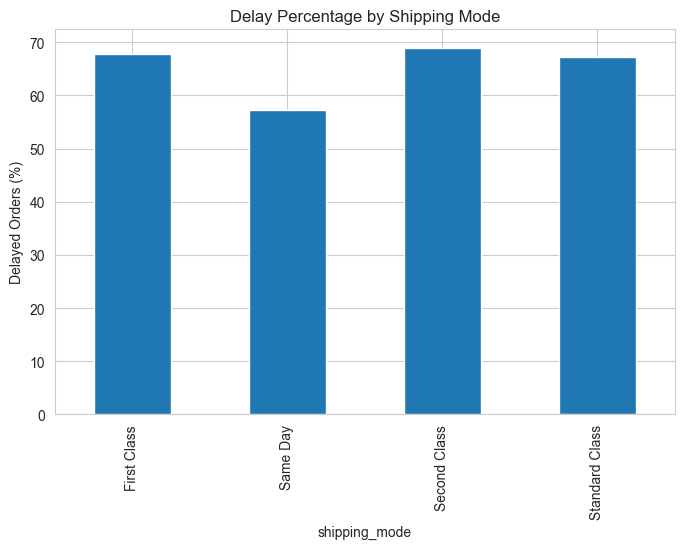

In [13]:
(df.groupby('shipping_mode')['delayed'].mean() * 100).plot(kind='bar')
plt.ylabel("Delayed Orders (%)")
plt.title("Delay Percentage by Shipping Mode")
plt.show()